<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion6/Exploratory%20Data%20Analysis%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)
## EDA en python

**Ver contenido adicional de la sesión  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion6/Presentacion%20M3%20Clase%201%20-%20Introducci%C3%B3n%20EDA.pptx)**

<h2>Objetivos:</h2>
<ul>
    <li>Conocer una de las opciones que tenemos para descargar bases de datos que nos puedan ayudar a practicar lo que hemos visto en clase.</li>
    <li>Utilizar las funciones que hemos visto en clase para entender cómo se compone una base de datos y el comportamiento de sus variables.</li>
    <li>Entender la importancia de visualizar las variables en un EDA.</li>
</ul>

<h2>Introducción</h2>
El día de hoy vamos a realizar un análisis exploratorio de los datos en Python.
Para esto, vamos a usar las funciones que hemos aprendido en clases pasadas y algunas funciones nuevas.<br>
También vamos a explorar la página Kaggle, la cual contiene una gran cantidad de bases de datos que se han cargado por personas de la comunidad de analítica y ciencia de datos para practicar nuestras habilidades al analizar y usar diversas bases de datos.


<h2>Kaggle</h2>

Lo primero que vamos a hacer es entrar a la página de <b>Kaggle</b>, esta es https://www.kaggle.com/

Luego de registrarnos vamos a buscar una base de datos que sea de nuestro interés.<br>
Para esto en el menú de la izquierda vamos a seleccionar la opción `Datasets`<br>

Hoy vamos a usar una base de datos de <b>Netflix</b>.

Vamos a usar esta base de datos que tiene un valor de usabilidad de 10, lo que nos dice que la comunidad lo ha calificado como una base de datos útil.<br>
Luego de esto solo tenemos que descargar la base de datos, para esto podemos hacer click en la parte de la derecha donde dice `Download (1MB)`.<br>
De igual forma, la base de datos la podremos encontrar también dentro de los documentos del curso, por si no encontramos esta misma base de datos.<br>

Descargando la base de datos de esta forma vamos a obtener un archivo en formato `.zip` con todas las variables.<br>
Esto es todo lo que vamos a necesitar hacer en esta clase, pero les recomendamos explorar la página para familiarizarnos con la base de datos y la página de <b>Kaggle</b>.

# EDA

## Librerías

Personalmente recomiendo usar el criterio `pd.set_option('display.max_columns', None)` para visualizar todas las columnas, esto consume un poco más de memoria en el computador, pero por lo general una base de datos no va a manejar una gran cantidad de columnas que pueda llegar a afectar el rendimiento del computador.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion6/datos/netflix_titles.csv")

## Exploración inicial (funciones básicas)
Como un primer paso para entender la base de datos vamos a ver la cantidad de registros y visualizar los primeros datos.<br>
Este paso es muy importante para ver que los datos se hayan cargado de forma efectiva y entender las variables con las que vamos a trabajar.<br>
De igual forma vamos a imprimir el nombre de todas las columnas que contiene el DataFrame.

In [ ]:
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Una de las funciones que nos aporta mayor información para empezar a entender cómo se componen nuestros datos es `.info()`, donde podemos ver la lista de columnas, la cantidad de valores no-nulos que tiene cada variable y el tipo de objeto o variable que identifica Pandas de forma automática.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Cómo se ha visto en clases anteriores, la función `describe()` nos muestra un análisis descriptivo básico de cada columna. Si se pasa la función sin ningún parámetro vamos a tener el análsis de todas las variables numércias, pero también podemos realizar otro tipo de análisis con variables categóricas o de tipo `object`.

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Al momento de entender una base de datos es importante conocer si tenemos registros duplicados, para esto podemos usar la función `.duplicated()` en conjunto con la función `.sum()` para tener la cantidad total de registros con duplicados completos.

In [ ]:
df.duplicated().sum()

0

La misma función la podemos usar con un subset, especificando la o las columnas donde vamos a revisar duplicados, para algunas variables nos puede interesar que no tengamos duplicados (por ejemplo la columna del ID si la vamos a usar como una llave) y otras variables donde si podríamos encontrar duplicados (por ejemplo es de esperar que un director haya producido más de una película).

In [ ]:
print(df.duplicated(subset="show_id").sum())
print(df.duplicated(subset="director").sum())

0
4278


También podemos encontrar la cantidad de registros únicos, es decir un "conteo distinto" o una agrupación por los valores diferentes que vamos a tener.

In [ ]:
df["country"].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Esta misma tabla de valores únicos la vamos a tener en el índice de una tabla de frecuencias producida por un `.value_counts()`, pero el orden va a estar delimitado por la frecuencia de registros.

In [ ]:
df["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Para obtener el número de registos nulos en todas las columnas podemos usar la función `.isnull()` junto con la función `.sum()`. esto nos va a mostrar la cantidad de datos nulos en cada columna. Es importante tener en cuenta que los datos nulos no son los datos que están errados necesariamente. puede haber datos errados con algún valor o dependiendo de la temática es posible que un datos nulo si esté justificado... en otras palabras <b>tenemos que aprender a trabajar con los nulos</b>.

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

No obstante, para algunas funciones no vamos a poder trabajar si tenemos datos nulos, por esto podemos usar `.fillna()` para llenar todos los datos faltantes con un valor predeterminado.

In [ ]:
df["country"] = df["country"].fillna("No Definido")

De igual forma, tenemos la posibilidad de reemplazar valores específicos por otros datos, esto se realiza con la función `.replace()`, donde el primer argumento es el elemento que vamos a eliminar y el segundo argumento es el elemento por el cual lo vamos a eliminar. En la siguiente función estámos especificando los valores de una columna (es decir una Serie) y para acceder a los valores individuales especificamos que los vamos a tratar como string por medio del comando `.str`.<br>
<b>Tip:</b> podemos reemplazar por "" (es decir nada) para eliminar elementos.

In [ ]:
df["show_id"] = df["show_id"].str.replace("s", "TV-show")

Ahora vamos a hacer un trabajo con los datos que solo sean de programas de televisión. Por esto, vamos primero a crear un nuevo DataFrame que sea de programas de televisión. Ya conocemos cómo hacer filtros pero vamos a complementar esta función con una tabla de frecuencia para ver la cantidad de registros por cada categoría y lo más útil en este caso <i>cómo están escritas y si hay grupos que debamos corregir</i>.

In [ ]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
df_tv = df[df["type"] == "TV Show"]
print(df_tv.shape)
df_tv.tail(2)

(2676, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8800,TV-show8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8803,TV-show8804,TV Show,Zombie Dumb,NaN,NaN,No Definido,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


Dentro de la base de datos vemos que hay una columna con la que no vamos a trabajar que es la descripcion (tal vez en un futuro si trabajamos con lenguaje natural la usaremos, pero por ahora no), por esto la vamos a eliminar.

In [ ]:
df.drop("description", axis=1, inplace=True)

## Exploración inicial (manejo de tipos de variables)

Otro elemento de importancia al trabajar con datos es el tipo de variable que vamos a usar. Pandas trata de reconocer los tipos de variables de forma automática, pero no siempre es acertado, por esto podríamos tener que modificar una variable de tipo de forma manual.

Vamos a modificar la fecha de un formato de `object` a `datetime` que nos va a ayudar a manipular los datos de una mejor manera.

A veces, debemos especificar el formato de cómo está la fecha para poder modificar la columna, pero por lo general Pandas es hábil detectando esto por sí mismo. En todo caso, la documentación para los formatos lo podemos encontrar en el siguiente enlace https://strftime.org/, pero primero es mejor intentar sin formato.

In [ ]:
df["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [ ]:
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y")

In [ ]:
df["date_added"][0]

Timestamp('2021-09-25 00:00:00')

In [ ]:
df["date_added"][0].day_name() #ahora podemos saber fácilmente qué día era el 25 de septiembre de 2021

'Saturday'

Vamos a modificar una variable que es la duración, esto con el objetivo de segmentar los datos y tener información con la que podamos trabajar más fácilmente.<br>
Con esto vamos a dividir la duración en el tiempo (valor numérico) y su clasificaión (tiempo vs temporadas)<br>
Como la columna "duration" es de tipo object, al dividirla sigue manteniendo ese formato, pero ahora la vamos a tratar como número, por esto la modificamos.

In [ ]:
df["duration"].isna().sum()

3

In [ ]:
df["duration"] = df["duration"].fillna("0 No_def")

In [ ]:
df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [ ]:
df[["duration_num", "duration_type"]] = df["duration"].str.split(expand=True)

In [ ]:
df.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
duration_num             object
duration_type            object
dtype: object

In [ ]:
df["duration_num"] = df["duration_num"].astype(int)

Por otra parte, podemos hacer operaciones sobre el total de una columna, operaciones como conteos, sumas, promedios, modas, incluso operaciones más complejas por medio de un `.apply()` junto con <b>lambda</b>.

In [ ]:
df["release_year"].sum()

17738885

In [ ]:
df["release_year"].mean()

2014.1801975701146

In [ ]:
df["release_year"].mode()

0    2018
Name: release_year, dtype: int64

In [ ]:
df["release_year"].median()

2017.0

## Exploración inicial (gráficos simples)

Recordemos que visualizar los datos nos va a ayudar a entender el comportamiento de los datos de una forma más sencilla, para esto vamos a usar algunos gráficos que pueden ser univariados, bivariados o multivariados.<br>
<b>Ejercicio:</b> Creen gráficos que brinden información de utilidad sobre la base de datos.

[Text(0.5, 1.0, 'Cantidad de shows vs películas')]

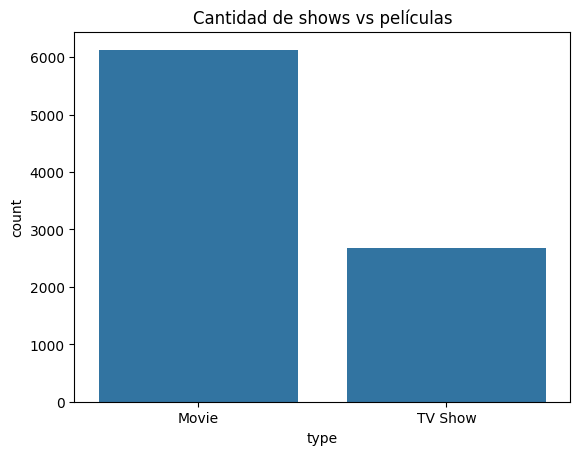

In [ ]:
sns.countplot(df, x="type").set(title="Cantidad de shows vs películas")

[Text(0.5, 1.0, 'Distribución por años')]

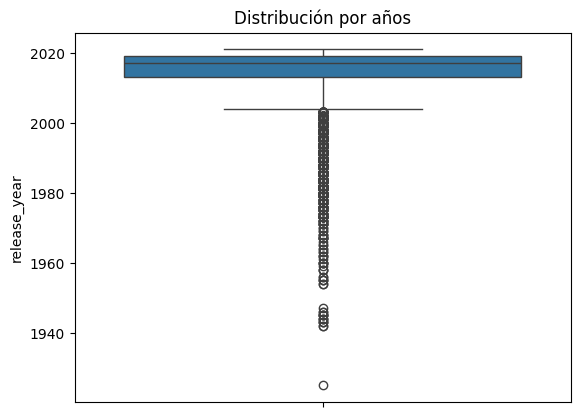

In [ ]:
sns.boxplot(df, y="release_year").set(title="Distribución por años")

### Ejercicio final: Entrar a datos.gov.co , buscar una base de datos de algún tema de interés y hacer un EDA.

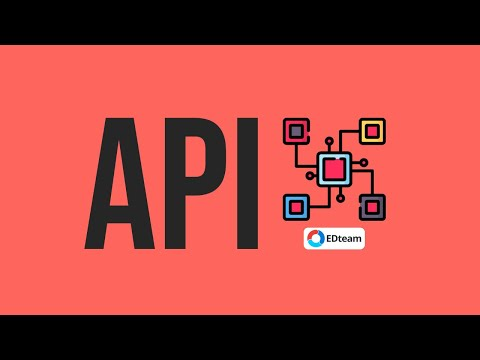

In [37]:
from IPython.display import YouTubeVideo
video_id = "u2Ms34GE14U"
YouTubeVideo(video_id, width=560, height=315)

## Opcional



### Introducción a la API de Socrata

La API de Socrata, conocida como Socrata Open Data API (SODA), te permite consultar conjuntos de datos alojados en plataformas Socrata. Con esta API, puedes realizar operaciones como leer datos, filtrarlos y realizar consultas más complejas. Los datos se pueden devolver en varios formatos, incluyendo JSON, XML y CSV.

### Paso 1: Encuentra el Conjunto de Datos

Antes de poder realizar una consulta, necesitas encontrar el conjunto de datos con el que deseas trabajar. Este tutorial asume que ya has encontrado un conjunto de datos en una plataforma Socrata que te interesa. Cada conjunto de datos tiene una URL base única, que necesitarás para tus consultas.


### $select

Selecciona las columnas `nombre_de_la_entidad` y `estado_del_proceso` del conjunto de datos:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=nombre_de_la_entidad,estado_del_proceso
```

### $where

Filtra para obtener solo las filas donde `estado_del_proceso` sea 'BORRADOR':

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$where=estado_del_proceso='BORRADOR'
```

### $order

Ordena los resultados por la columna `valor_contrato` en orden descendente:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$order=valor_contrato DESC
```

### $group

Agrupa los resultados por la columna `departamento_entidad`:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=departamento_entidad,count(*)&$group=departamento_entidad
```

### $having

Filtra los grupos teniendo más de 10 contratos:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$select=departamento_entidad,count(*) as num_contratos&$group=departamento_entidad&$having=num_contratos > 10
```

### $limit

Limita los resultados a solo 5 filas:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$limit=5
```

### $offset

Comienza a devolver los resultados a partir de la fila número 10:

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$offset=10
```

### $q

Realiza una búsqueda de texto completo en todas las columnas por la palabra 'OBRA':

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$q=OBRA
```

### $query

Realiza una consulta completa, combinando múltiples operaciones (Nota: `$query` no siempre está soportado en todos los endpoints de Socrata):

```
https://www.datos.gov.co/resource/rpmr-utcd.json?$query=SELECT nombre_de_la_entidad, valor_contrato WHERE estado_del_proceso='CONVOCADO' ORDER BY valor_contrato DESC LIMIT 10
```

Recuerda que estos ejemplos están diseñados para ser utilizados tal como están en la URL del navegador o dentro de una solicitud HTTP en una herramienta de desarrollo de API o en código.

Revisa la siguiente documentación https://dev.socrata.com/docs/queries/

Desde python:


In [38]:
%%capture
pip install sodapy

In [39]:
import pandas as pd
from sodapy import Socrata

# Inicializa el cliente Socrata
client = Socrata("www.datos.gov.co", None)

In [40]:
# $select
# Selecciona columnas específicas
results_select = client.get("rpmr-utcd", select="nombre_de_la_entidad, estado_del_proceso", limit=10000)
df_select = pd.DataFrame.from_records(results_select)
df_select


,nombre_de_la_entidad,estado_del_proceso
0,EJERCITO NACIONAL,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO
1,CUNDINAMARCA ALCALDIA MUNICIPIO DE FUQUENE,CONVOCADO
2,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,CONVOCADO
3,EJERCITO NACIONAL,ADJUDICADO
4,CALDAS ALCALDIA MUNICIPIO DE MANIZALES,ADJUDICADO
...,...,...
9995,CAUCA ALCALDIA MUNICIPIO DE POPAYAN,ADJUDICADO
9996,CHOCO ALCALDIA MUNICIPIO DE RIOSUCIO,CONVOCADO
9997,CORTOLIMA CORPORACION AUTONOMA REGIONAL DEL T...,CONVOCADO
9998,RAMA JUDICIAL,CONVOCADO


In [41]:
# $where
# Filtra resultados basados en una condición específica
results_where = client.get("rpmr-utcd", where="estado_del_proceso='BORRADOR'", limit=10000)
df_where = pd.DataFrame.from_records(results_where)
df_where

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,HUILA GOBERNACION,800103913,HUILA,NEIVA,BORRADOR,CONTRATACION DIRECTA MENOR CUANTIA,NO DEFINIDO,COMPRA DE ELEMENTOS PARA DOTAR EL CENTRO MEDIC...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,05-2-7055,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,CUNDINAMARCA GOBERNACION,899999114,BOGOTA DC,BOGOTA DC,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,SE�ALIZACION VIAL ZONA URBANA Y RURAL PARA LOS...,OBRA,OBRA,NO DEFINIDO,10-11-424473,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,CESAR ALCALDIA MUNICIPIO DE PAILITAS,891180194-4,CESAR,PAILITAS,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,COMPRA DE CAMIONETA,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,08-11-106880,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,TERRITORIAL,RISARALDA ALCALDIA MUNICIPIO DE DOSQUEBRADAS,890984043-8,RISARALDA,DOSQUEBRADAS,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,LA CONSTRUCCION DE LA CASETA COMUNAL DEL BARRI...,OBRA,OBRA,NO DEFINIDO,09-11-281482,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,ANTIOQUIA INDER ENVIGADO INSTITUTO DE DEPORT...,811016337,ANTIOQUIA,ENVIGADO,BORRADOR,SUBASTA,NO DEFINIDO,SUMINISTRO DE ELEMENTOS DE ASEO PARA LA PRESEN...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-9-281503,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TERRITORIAL,TOLIMA ALCALDIA MUNICIPIO DE FALAN,800100054,TOLIMA,FALAN,BORRADOR,LICITACION PUBLICA,NO DEFINIDO,MANUAL DE CONTRTACION,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,14-1-123191,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,HUILA ALCALDIA MUNICIPIO DE BARAYA,891180183,HUILA,BARAYA,BORRADOR,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,REALIZAR LA INTERVENTORIA TECNICA ADMINISTRATI...,INTERVENTORIA,INTERVENTORIA,NO DEFINIDO,15-15-3917881,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,NACIONAL,CARDER CORPORACION AUTONOMA REGIONAL DE RISAR...,891410354,RISARALDA,PEREIRA,BORRADOR,SUBASTA,NO DEFINIDO,ADQUISICION DE EQUIPOS PARA EL SISTEMA DE VIGI...,OTRO TIPO DE CONTRATO,OTRO TIPO DE CONTRATO,NO DEFINIDO,15-9-405399,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,NORTE DE SANTANDER IFINORTE,NO DEFINIDO,NORTE DE SANTANDER,SAN JOSE DE CUCUTA,BORRADOR,CONCURSO DE MERITOS ABIERTO,NO DEFINIDO,SELECCIONAR UN SOCIO OPERADOR PARA QUE BAJO SU...,OTRO TIPO DE CONTRATO,OTRO TIPO DE CONTRATO,NO DEFINIDO,15-15-4362872,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [42]:
# $order
# Ordena los resultados por una columna específica
results_order = client.get("rpmr-utcd", order="valor_contrato DESC", limit=10000)
df_order = pd.DataFrame.from_records(results_order)
df_order

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,ATLANTICO ESE HOSPITAL LOCAL DE LURUACO,890103025,ATLANTICO,LURUACO,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,20-4-11452712,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,AMAZONAS ALCALDIA MUNICIPIO DE PUERTO NARI�O,890981000-8,AMAZONAS,PUERTO NARI�O,CONVOCADO,CONTRATACION DIRECTA LEY 1150 DE 2007,NO DEFINIDO,PRESTACION DE SERVICIOS PROFESIONALES PARA EL ...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,21-12-11663163,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,CALDAS HOSPITAL SAN FELIX DE LA DORADA,NO DEFINIDO,CALDAS,LA DORADA,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,LICITACION PUBLICA,NO DEFINIDO,ESTUDIOS Y DOCUMENTOS PREVIOS PARA LA CELABRAC...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,18-1-189298,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,TERRITORIAL,CHOCO ALCALDIA MUNICIPIO DE SAN JOSE DEL PALMAR,NO DEFINIDO,CHOCO,SAN JOSE DEL PALMAR,DESCARTADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,SUMINISTRO DE MATERIAL DE CONSTRUCCION EN ESPE...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,22-11-13375506,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,TERRITORIAL,SUCRE ESE UNIDAD DE SALUD SAN FRANCISCO DE AS...,823001518,SUCRE,SINCELEJO,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,EJECUCION DE ACTIVIDADES DEL PLAN DE INTERVENC...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,19-4-9470551,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NACIONAL,AGENCIA DE RENOVACION DEL TERRITORIO,111111111,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION DIRECTA LEY 1150 DE 2007,NO DEFINIDO,EL CONTRATISTA SE OBLIGA A PRESTAR A LA ART SU...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,18-12-8633469,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9996,TERRITORIAL,ATLANTICO ALCALDIA MUNICIPIO DE PALMAR DE VARELA,800003253-2,ATLANTICO,PALMAR DE VARELA,CONVOCADO,CONTRATACION DIRECTA LEY 1150 DE 2007,NO DEFINIDO,ADQUISICION DE MATERIAL DIDACTICO INTERACTIVO ...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,19-12-9272471,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9997,TERRITORIAL,VALLE DEL CAUCA ESE HOSPITAL SAN RAFAEL EL C...,891380103,VALLE DEL CAUCA,EL CERRITO,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,DESARROLLAR LOS PROCESOS SUBPROCESOS Y ACTIVID...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,20-4-10870888,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9998,TERRITORIAL,ANTIOQUIA INSTITUTO TECNOLOGICO METROPOLITANO...,800214750,ANTIOQUIA,MEDELLIN,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION DE UN CENTRO DE TORNEADO CNC PARA ...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,18-11-7904613,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [43]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   nivel_entidad               10000 non-null  object
 1   nombre_de_la_entidad        10000 non-null  object
 2   nit_de_la_entidad           10000 non-null  object
 3   departamento_entidad        10000 non-null  object
 4   municipio_entidad           10000 non-null  object
 5   estado_del_proceso          10000 non-null  object
 6   modalidad_de_contrataci_n   10000 non-null  object
 7   objeto_a_contratar          10000 non-null  object
 8   objeto_del_proceso          10000 non-null  object
 9   tipo_de_contrato            10000 non-null  object
 10  tipo_contrato               10000 non-null  object
 11  numero_del_contrato         10000 non-null  object
 12  numero_de_proceso           10000 non-null  object
 13  valor_contrato              10000 non-null  obj